# NLP: Generando nuevas frases motivaciones

 a partir del dataset 'allquotes.csv' 

In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [2]:
import fastai.basics as fai
import fastai.text as ftxt
import pandas as pd
import numpy as np


In [3]:

import PIL
import textwrap
from PIL import ImageFont
from PIL import Image
from PIL import ImageDraw

In [4]:

import random
import os
import glob
import matplotlib.pyplot as plt

# Data

In [5]:
df = pd.read_csv('allquotes.csv',header=None, names=['quote', 'author'])
df = df.drop(['author'], axis=1)
df = df.dropna()

In [6]:
df.head()

,quote
0,“Do one thing every day that scares you.”
1,"“We are what we pretend to be, so we must be c..."
2,"“When we love, we always strive to become bett..."
3,“Sometimes you wake up. Sometimes the fall kil...
4,"“Hold fast to dreams,For if dreams dieLife is ..."


In [7]:
df['quote'] = df['quote'].str.lower()

In [8]:
df.head()

,quote
0,“do one thing every day that scares you.”
1,"“we are what we pretend to be, so we must be c..."
2,"“when we love, we always strive to become bett..."
3,“sometimes you wake up. sometimes the fall kil...
4,"“hold fast to dreams,for if dreams dielife is ..."


In [9]:
valid_pct = 0.1 #validation percent
df = df.iloc[np.random.permutation(len(df))]
cut = int(valid_pct * len(df)) + 1
train_df, valid_df = df[cut:], df[:cut]

In [10]:
len(train_df), len(valid_df)

(10883, 1210)

In [11]:
data_lm = ftxt.TextLMDataBunch.from_df('data', train_df, valid_df, text_cols='quote')

# Langueaje Model¶

In [12]:
learn_lm = ftxt.language_model_learner(data_lm, ftxt.AWD_LSTM)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


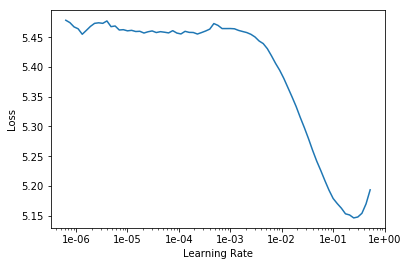

In [13]:
learn_lm.lr_find(); learn_lm.recorder.plot(skip_end=15)

In [14]:
learn_lm.fit_one_cycle(20, 1e-2, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,5.154649,4.457629,0.210290,00:08
1,4.667331,3.966631,0.286429,00:08
2,4.313653,3.816266,0.300737,00:08
3,4.086241,3.755124,0.304844,00:08
4,3.940659,3.726749,0.308996,00:08
5,3.835629,3.713304,0.312857,00:08
6,3.729020,3.708623,0.313281,00:08
7,3.643127,3.707790,0.314687,00:08
8,3.575187,3.704256,0.315781,00:08
9,3.505867,3.704058,0.317991,00:08


In [16]:
learn_lm.save("lm-1")

In [17]:
learn_lm.save_encoder('lm-1-encoder')

In [15]:
learn_lm.unfreeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


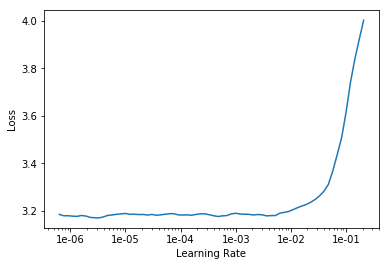

In [16]:

learn_lm.lr_find(); learn_lm.recorder.plot(skip_end=15)

In [17]:
learn_lm.fit_one_cycle(5, 1e-4, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,3.176353,3.680444,0.323013,00:11
1,3.141964,3.672411,0.324888,00:11
2,3.108166,3.668453,0.327121,00:11
3,3.097966,3.666096,0.327187,00:11
4,3.083907,3.666995,0.327790,00:11


# Validate and Save

In [18]:
learn_lm.validate()

[3.6623108, tensor(0.3287)]

In [22]:
learn_lm.save("lm-final")

In [23]:

learn_lm.save_encoder('lm-encoder')

In [24]:
learn_lm.export()

# Generating Quotes

In [19]:

def generatequote():    
    quotes = []
    while quotes==[]:
        idea = learn_lm.predict("xxbos", n_words=20, temperature=0.75)
        ideas = idea.split("xxbos")
        if ideas[1][-1] == "”":
            quotes.append(ideas[1])
            
    message = quotes[0][:]
    message = '“'+message[3:].capitalize()
    message = message.replace(' . ','.')
    message = message.replace(' ,',',')
    message = message.replace("do n't", "don't")
    message = message.replace("ca n't", "can't")
    message = message.replace("we 're", "we're")
    message = message.replace(" ’s", "’s")
    message = message.replace(" 've", "'ve")
    
    return message

In [21]:
message = generatequote()
print(message)

“You may think that you don't have to have somebody else be ready to give up.”
